# Predspracovanie numerickych stĺpcov

In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

In [2]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]

c:\users\michal_hucko\documents\tutorials\classification-sk\.env\classification\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

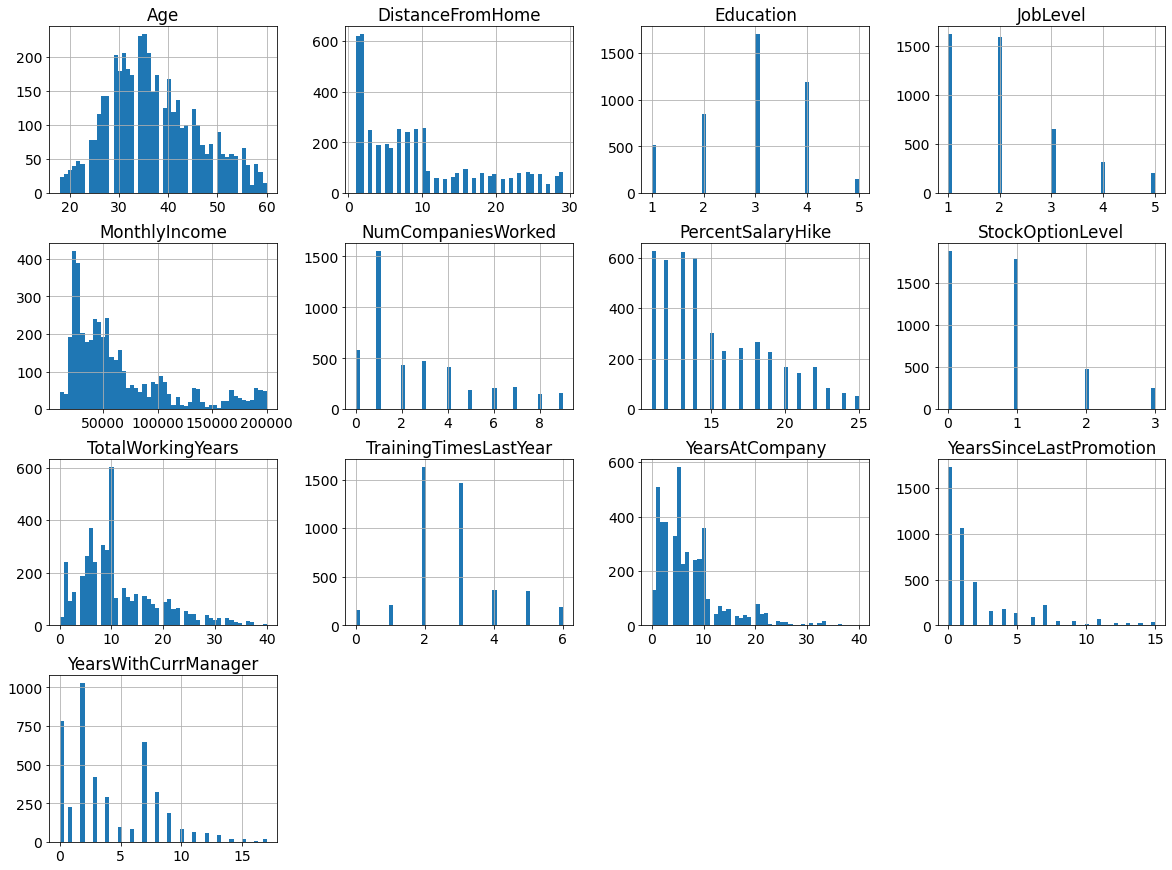

In [3]:
X.hist(bins=50)

# Normalizácia
V tomto prípade sa dát apreškálujú na určitý interval. Žiadne z pozorovaní nebude mimo tohto intervalu.

## Min max Normalizácia
Dáta sa preškálujú na interval <0:1>

<img src="assets/normalization.png" width="200" height="200">

!!!! POZOR toto škálovani je veľmi citlivé na outlajerov !!!!

In [4]:
test_arr=[1,2,3]
min_elemnt=1
max_element=3
test_arr

[1, 2, 3]

In [5]:
denominator=max_element-min_elemnt # menovateľ
[
    (test_arr[0] - (min_elemnt))/denominator,
    (test_arr[1] - (min_elemnt))/denominator,
    (test_arr[2] - (min_elemnt))/denominator,
]


[0.0, 0.5, 1.0]

<AxesSubplot:>

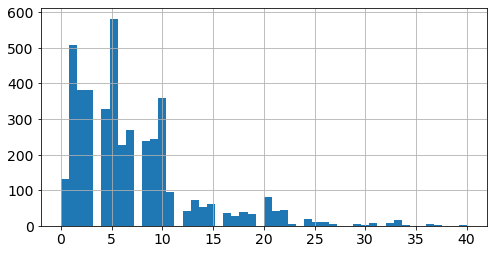

In [6]:
X.YearsAtCompany.hist(bins=50, figsize=(8, 4))

In [7]:
X.YearsAtCompany.head().values.reshape(-1,1)

array([[1],
       [5],
       [5],
       [8],
       [6]], dtype=int64)

<AxesSubplot:>

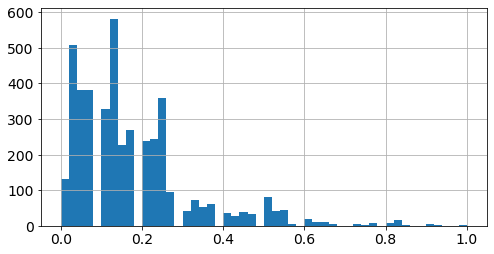

In [8]:
normalizer = MinMaxScaler()
result = normalizer.fit_transform(X.YearsAtCompany.values.reshape(-1,1))
pd.Series(result.reshape(1,-1)[0]).hist(bins=50, figsize=(8, 4))

In [9]:
X.YearsAtCompany.values.reshape(-1,1)

array([[1],
       [5],
       [5],
       ...,
       [3],
       [4],
       [9]], dtype=int64)

In [10]:
result

array([[0.025],
       [0.125],
       [0.125],
       ...,
       [0.075],
       [0.1  ],
       [0.225]])

## Z-Normalizácia (Standard scaling)
Dáta majú rôznu distribúciu (rôzny priemer a štandardnú odchýlku). Táto operácia vycentruje dáta okolo priemeru 0.

z = (x - u) / s

x - dáta</br>
u - priemer dát</br>
s - odchýlka</br>

!!!! POZOR toto škálovanie je vhodné len ak dáta spĺňajú podmienky normálového rozloženia !!!!

In [11]:
X.YearsAtCompany.mean()

7.010497489730716

In [12]:
X.YearsAtCompany.values.reshape(-1,1)

array([[1],
       [5],
       [5],
       ...,
       [3],
       [4],
       [9]], dtype=int64)

<AxesSubplot:>

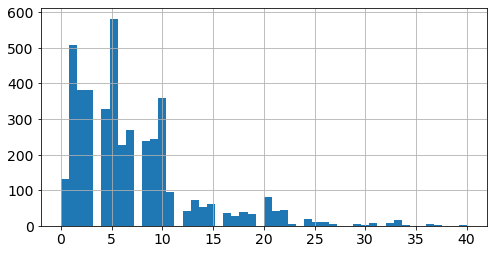

In [13]:
X.YearsAtCompany.hist(bins=50, figsize=(8, 4))

<AxesSubplot:>

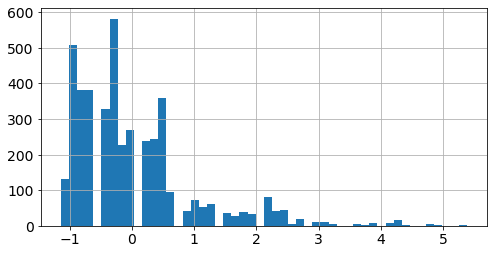

In [14]:
scaler = StandardScaler()
result = scaler.fit_transform(X.YearsAtCompany.values.reshape(-1,1))
pd.Series(result.reshape(1,-1)[0]).hist(bins=50, figsize=(8, 4))

In [15]:
pd.Series(result.reshape(1,-1)[0]).mean()

1.4998905307578565e-17

# Kedy musím a kedy nemusím dáta škálovať?
Vždy keď o algoritmus čo používa vczdialenostnú metriku (euclid dist. napr.) sa odporúča dáta preškálovať. KNN používa vzdialenostnú metriku. Iné algoritmy:

- K-means algoritmus klastrovania (zhlukovania).
- Algoritmy neurónových sietí, ktoré využívajú algoritmus gradient descent.
- Principal Component Analysis(PCA)

Naopak pri niektorých algoritmov nie je vždy škálovanie nutnosť. Ako napríklad
- Decisions trees
- Random forest 
- XGBoost
Tu si treba dať pozor ak vŕamci pipeliny použijeme krok, ktorý očakáva škálovanie!!!!!!! (napríklad pri selekcií čŕt).

# Iné algoritmy škálovania
- <b>Max Abs Scaler</b> (škálovanie na základe maximálnej absolúdnje hodnoty črty)
- <b>Robust Scaler</b> (škálovanie na základe quantilového rozpätia ideálne v prípade veľkého množstva outlajerov)
- <b>Quantile Transformer Scaler</b>
- <b>Power Transformer Scaler</b>
- <b>Unit Vector Scaler</b>

# Prečo to potrebujeme? 
KNN ráta vzdialenostné metriky. Zoberme si príklad dataframu

In [16]:
test_df=pd.DataFrame({"Vek": [10,20,80,20,30,40], "Mesačný príjem": [3000, 8000, 10000, 4000, 20000, 10000]})
test_df

,Vek,Mesačný príjem
0,10,3000
1,20,8000
2,80,10000
3,20,4000
4,30,20000
5,40,10000


In [17]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances([[10, 3000]], [[50, 10000]])

array([[7000.11428478]])

Keď dáta nepreškálujeme dištančná metrika bude dávať väčšiu váhu stĺpcom s vyššími hodnotami

### Aplikácia na celý dataframe

c:\users\michal_hucko\documents\tutorials\classification-sk\.env\classification\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

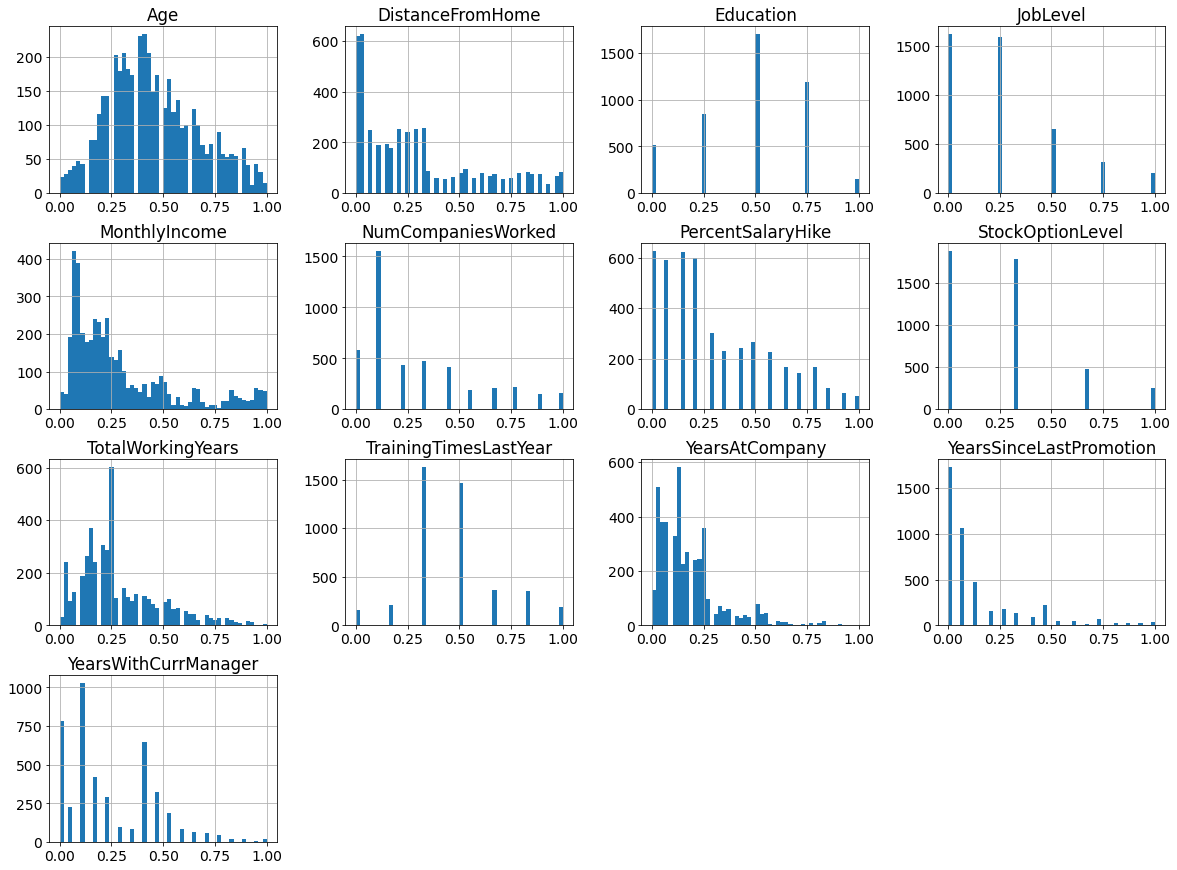

In [18]:
scaler = MinMaxScaler()
results=scaler.fit_transform(X)
X_scaled = pd.DataFrame(results, index=X.index, columns=X.columns)
X_scaled.hist(bins=50)

## POZOR na škálovanie testovacej sady !!!!
Všetky hodnoty potrebné na škálovani musíme vždy vyrátať len z trénovacích dát !!!!! Pri tesovaní musíme simulovať reálnu situáciu kedy dáta z testovacej sady vidíme prvý krát.

In [19]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
# Train the scaler with the train data
X_train = scaler.fit_transform(X_train)
# transform the test data 
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.23581097,  2.42486616, -1.87851102, ...,  1.93406752,
         4.02578168, -0.59293362],
       [-1.19796631, -0.02809887, -1.87851102, ..., -0.6473897 ,
        -0.68468661, -0.59293362],
       [ 0.78726377,  1.3210319 ,  0.0842796 , ..., -1.13141293,
        -0.68468661, -1.15122303],
       ...,
       [-0.53622295, -1.00928488, -1.87851102, ..., -0.80873077,
        -0.05662417, -0.59293362],
       [ 1.44900713, -0.15074712,  1.06567491, ...,  0.48199783,
        -0.37065539,  0.5236452 ],
       [-0.53622295,  1.44368015,  0.0842796 , ..., -0.6473897 ,
        -0.68468661, -0.59293362]])

# Ďalšie zaujímavé pojmy na Googlenie
- l1 normalization
- l2 normalization 
- outlier detection
- discretization